<a href="https://colab.research.google.com/github/johnvalen1/Balanced-Plus-ML-Club/blob/main/Machine_Learning_Experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# metrics and data preparation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier


# Wine Quality Prediction




In [52]:
from google.colab import files
uploaded = files.upload()

wine = pd.read_csv('winequality-red.csv')

Saving winequality-red.csv to winequality-red (1).csv


In [53]:
wine.head() 
#prints top 5 rows of the data table, notice the last column 'quality' is what we wish to predict.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [54]:
wine.info() 
#notice we have 1599 rows in the dataset, with 12 columns (this means we have 12 variables, of which one is 'quality', so there are 11 feature variables predicting quality)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Feature variables include:

    - fixed acidity — primary fixed acids found in wine are tartaric, succinic, citric, and malic.
    - volatile acidity — the gaseous acids present in wine.
    - citric acid — the weak organic acid found in citrus fruits naturally.
    - residual sugar — amount of sugar left after fermentation.
    - chlorides — amount of salt present in wine.
    - free sulfur dioxide — used for prevention of wine by oxidation and microbial spoilage.
    - total sulfur dioxide — the portion of SO2 that is free in the wine plus the portion that is bound to other chemicals in the wine.
    - density — the mass per unit volume of wine.
    - pH — used for checking acidity.
    - sulphates — preserve freshness and protect wine from oxidation, and bacteria.
    - alcohol — percent of alcohol present in wine.

Target variable is:

    - quality (scores are between 0 and 10)

# Exploratory Data Analysis (EDA)

In [55]:
wine.isna().sum()
#check if any values in our dataset are NULL:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

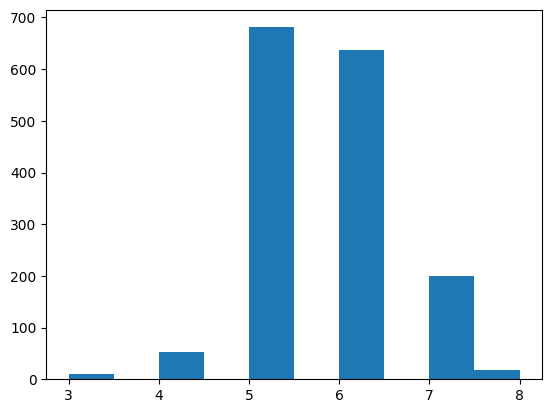

"\nCheck your target, 'quality' and see what scores are common. \nFinding: the majority of quality scores are between 5-7. Very few wines are terrible, or exceptional. The model will therefore see more 'average' wines, and less extreme ones. \n"

In [56]:
plt.hist(wine['quality'])
plt.show()
'''
Check your target, 'quality' and see what scores are common. 
Finding: the majority of quality scores are between 5-7. Very few wines are terrible, or exceptional. The model will therefore see more 'average' wines, and less extreme ones. 
'''

Let's turn this into a classification task by defining classes - 'poor' and 'good'. As such, wines can be classified as either poor or good, and this is a binary classification problem.

Wines with a quality score between 3 and 6 are classified as 'poor' - given a y-value of 0. 
Wines with a quality score between 7 and 8 are classified as 'good' - given a y-value of 1.

In [57]:
wine['quality'] = wine['quality'].replace([3, 4, 5, 6], 'poor')
wine['quality'] = wine['quality'].replace([7, 8], 'good')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,poor
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,poor
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,poor
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,poor
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,poor


array([<Axes: ylabel='quality'>], dtype=object)

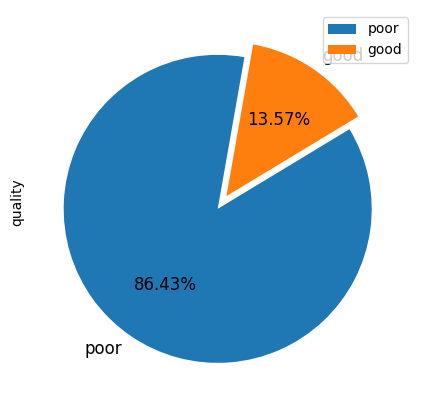

In [63]:
wine.quality.value_counts().plot(kind='pie', subplots=True, autopct='%1.2f%%', explode= (0.05, 0.05), startangle=80, legend=True,
                                 fontsize=12, figsize=(8,5), textprops={'color':"black"})

"\nThis heatmap shows extent of correlations between features - ideally, you want the correlations to be as close to 0 as possible! \n\nIf you have features that are very correlated amongst themselves, their inclusion into the model is redundant, and bloats the model. \nAlways think to yourself: how can I minimize complexity while maximizing capacity?\nFinding: the features are not terribly correlated amongst themselves, with the exception of 'free sulfur dioxide' and 'total sulfur dioxide' which have correlation of 0.67- a moderate correlation. \n"

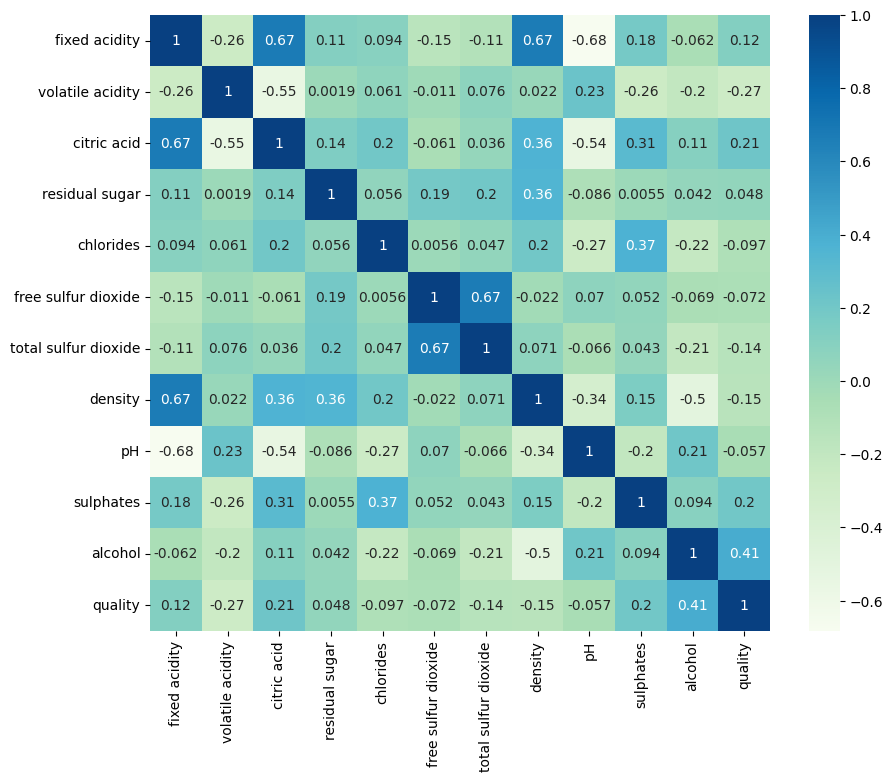

In [45]:
corr = wine.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True, cmap = 'GnBu')

'''
This heatmap shows extent of correlations between features - ideally, you want the correlations to be as close to 0 as possible! 

If you have features that are very correlated amongst themselves, their inclusion into the model is redundant, and bloats the model. 
Always think to yourself: how can I minimize complexity while maximizing capacity?
Finding: the features are not terribly correlated amongst themselves, with the exception of 'free sulfur dioxide' and 'total sulfur dioxide' which have correlation of 0.67- a moderate correlation. 
'''

# Training and Testing Splits

In [58]:
x_data = wine.drop('quality', axis = 1)
y_data = wine['quality']

In [59]:
x_data.head()
# notice the absence of the y-column.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [60]:
random_seed = 42
test_size = 0.2

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = test_size, random_state = random_seed)

In this next snippet, we 'normalize' the feature data X. This means that we transform all numerical variables to have mean 0 and standard deviation 1.  The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model, and is a statistical motivation.

In [61]:
sc = StandardScaler()
x_training_data = sc.fit_transform(x_training_data)
x_test_data = sc.fit_transform(x_test_data)

# Training and Testing with Different Models

**Random Forest Classifier**

In [62]:
# Create model object. 
model_rf = RandomForestClassifier(n_estimators = 200)

# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)

# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

# Calculate the Accuracy Score.
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.871875


Classification report

Think of 'good' as positive, and 'poor' as negative:

 - Precision - What proportion of positive identifications was actually correct?
 - Recall - What proportion of actual positives was identified correctly?
 
 - F1-score - The harmonic mean of the precision and recall. It thus symmetrically represents both precision and recall in one metric.

 Ideally, you want a high F1-score for a binary classifier, as this means both precision and recall are quite balanced.

In [64]:
print(classification_report(y_test_data, predictions_rf))

              precision    recall  f1-score   support

        good       0.60      0.38      0.47        47
        poor       0.90      0.96      0.93       273

    accuracy                           0.87       320
   macro avg       0.75      0.67      0.70       320
weighted avg       0.86      0.87      0.86       320



**Logistic Regression Model**

In [65]:
# Create model object. 
model_lr = LogisticRegression()
# Train the model on the training data.
model_lr.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_lr = model_lr.predict(x_test_data)# Calculate the Accuracy Score.
lr = accuracy_score(y_test_data, predictions_lr)
print(lr)

0.875


In [66]:
# Show the classification report. 
print(classification_report(y_test_data, predictions_lr))

              precision    recall  f1-score   support

        good       0.71      0.26      0.37        47
        poor       0.88      0.98      0.93       273

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



**Support Vector Machine**

In [67]:
# Create model object. 
model_svc = SVC()
# Train the model on the training data.
model_svc.fit(x_training_data, y_training_data)
# Make predictions on the test data. 
predictions_svc = model_svc.predict(x_test_data)# Calculate the Accuracy Score.
svm = accuracy_score(y_test_data, predictions_svc)
print(svm)

0.875


In [68]:
print(classification_report(y_test_data, predictions_svc))

              precision    recall  f1-score   support

        good       0.71      0.26      0.37        47
        poor       0.88      0.98      0.93       273

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



# Comparing the Models Based on Classification Accuracy

,Model,Accuracy_score
1,Logistic Regression,0.875000
2,Support Vector Machine,0.875000
0,Random Forest,0.871875


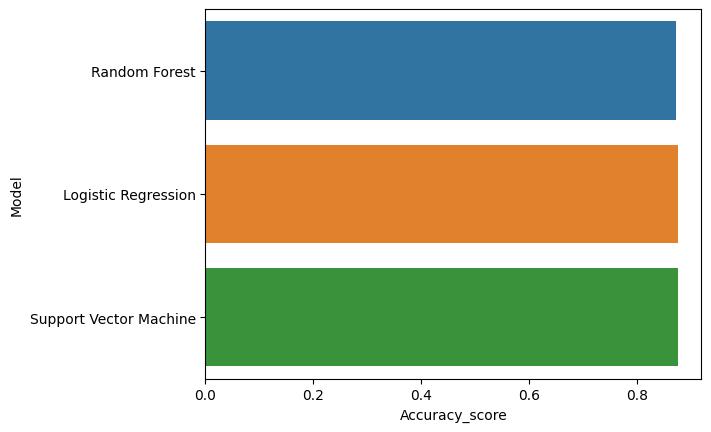

In [69]:
# Show Accuraccy Score by Model.
models = pd.DataFrame({
    'Model':['Random Forest', 'Logistic Regression', 'Support Vector Machine'],
    'Accuracy_score' :[rf, lr, svm]
})
models
sns.barplot(x='Accuracy_score', y='Model', data=models)

models.sort_values(by='Accuracy_score', ascending=False)

The models accuracy may be improved by having a larger dataset with more balance between poor and good quality wines. Also tuning some of the models hyper parameters may increase the accuracy score.

# As a Regression Task

The models above classify wines as either 'poor' or 'good' - but what if we leave the target in its original form, and build a model that will predict its actual score?

In [71]:
from google.colab import files
uploaded = files.upload()

wine = pd.read_csv('winequality-red.csv')

x_data = wine.drop('quality', axis = 1)
y_data = wine['quality']

Saving winequality-red.csv to winequality-red (3).csv


In [72]:
random_seed = 42
test_size = 0.2

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = test_size, random_state = random_seed)

In [73]:
sc = StandardScaler()
x_training_data = sc.fit_transform(x_training_data)
x_test_data = sc.fit_transform(x_test_data)

In [74]:
# Create model object. 
model_rf = RandomForestClassifier(n_estimators = 200)

# Train the model on the training data.
model_rf.fit(x_training_data, y_training_data)

# Make predictions on the test data. 
predictions_rf = model_rf.predict(x_test_data)

# Calculate the Accuracy Score.
rf = accuracy_score(y_test_data, predictions_rf)
print(rf)

0.628125


Why do you think the accuracy of this Random Forest Classifier is much lower now? 